<a href="https://colab.research.google.com/github/nabilanrzah/Mini-Portofolio/blob/main/3_Python_Application_for_Data_Analysis_Nabila_Nurazizah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pengaplikasian Python dalam Data Analysis

## Tujuan

Setelah menyelesaikan lab ini, kamu akan mampu untuk:
*   Mengunggah dataset dengan `file.upload` dan mengunduh dataset dengan `file.download`
*   Pengelolaan data `date`
*   Penggunaan fungsi `pivot_table` & `groupby`
*   Membuat dan menggunakan fungsi sederhana pada `DataFrame`
*   Membuat visualisasi secara sederhana dengan menggunakan `plot`
*   Menjalankan SQL di Colab dengan `sqlite3`

In [6]:
#1
#Mengimpor Libraries
import pandas as pd
import numpy as np
from google.colab import files #unggah dan unduh file
import io #membaca data

In [7]:
#2
#Mengimpor dataset
URL = 'https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/tokopaedi.csv'
df = pd.read_csv(URL)
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,subcategory,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Mengunggah dan Menggunduh Dataset

In [ ]:
#3
#Mengunggah dataset dengan upload file
unggah = files.upload()

In [ ]:
#4
#Membaca dataset
df_unggah = pd.read_csv('orders.csv') #untuk excel df_unggah = pd.read_excel
df_unggah

In [ ]:
#5
#Mengunduh dataset
df_unggah.to_csv('orders.csv')
files.download('orders.csv')

In [ ]:
#6
#Menampilkan gambaran data
df.info()

## Pengelolaan Data `Date`

In [8]:
#7
#Mengubah tipe kolom Date menjadi Datetime
df['order_date']= pd.to_datetime(df['order_date'])
df['ship_date']= pd.to_datetime(df['ship_date'])
df.dtypes

row_id                    int64
order_id                 object
order_date       datetime64[ns]
ship_date        datetime64[ns]
ship_mode                object
customer_id              object
customer_name            object
segment                  object
country                  object
city                     object
state                    object
postal_code               int64
region                   object
product_id               object
category                 object
subcategory              object
product_name             object
sales                   float64
quantity                  int64
discount                float64
profit                  float64
dtype: object

In [9]:
#8
#Membuat kolom tambahan untuk day, month, month_num
df['day']=df['order_date'].dt.day_name()
df['month']=df['order_date'].dt.month_name()
df['month_num']=df['order_date'].dt.month
df['year']=df['order_date'].dt.year
df['ship_delay'] = df['ship_date']-df['order_date']
df['ship_delay'] = df['ship_delay'].dt.days
df.head(5)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,product_name,sales,quantity,discount,profit,day,month,month_num,year,ship_delay
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,Tuesday,November,11,2016,3
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,Tuesday,November,11,2016,3
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,Sunday,June,6,2016,4
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,Sunday,October,10,2015,7
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,Sunday,October,10,2015,7


In [10]:
#9
#Latihan: Filter berdasarkan bulan October tahun 2015
df[(df['month'] == 'October') & (df['year'] == 2015)]

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,product_name,sales,quantity,discount,profit,day,month,month_num,year,ship_delay
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,Sunday,October,10,2015,7
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,Sunday,October,10,2015,7
109,110,CA-2015-129476,2015-10-15,2015-10-20,Standard Class,PA-19060,Pete Armstrong,Home Office,United States,Orland Park,...,Logitech Gaming G510s - Keyboard,339.9600,5,0.20,67.9920,Thursday,October,10,2015,5
189,190,CA-2015-102281,2015-10-12,2015-10-14,First Class,MP-17470,Mark Packer,Home Office,United States,New York City,...,"Atlantic Metals Mobile 4-Shelf Bookcases, Cust...",899.1360,4,0.20,112.3920,Monday,October,10,2015,2
190,191,CA-2015-102281,2015-10-12,2015-10-14,First Class,MP-17470,Mark Packer,Home Office,United States,New York City,...,I Need's 3d Hello Kitty Hybrid Silicone Case C...,71.7600,6,0.00,20.0928,Monday,October,10,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9416,9416,CA-2015-127824,2015-10-18,2015-10-22,Standard Class,JC-15775,John Castell,Consumer,United States,Seattle,...,Xerox 1903,17.9400,3,0.00,8.7906,Sunday,October,10,2015,4
9417,9417,CA-2015-127824,2015-10-18,2015-10-22,Standard Class,JC-15775,John Castell,Consumer,United States,Seattle,...,Eldon 100 Class Desk Accessories,10.1100,3,0.00,3.2352,Sunday,October,10,2015,4
9489,9489,CA-2015-156566,2015-10-01,2015-10-04,First Class,EM-13960,Eric Murdock,Consumer,United States,Portland,...,Wilson Electronics DB Pro Signal Booster,572.8000,2,0.20,50.1200,Thursday,October,10,2015,3
9912,9913,CA-2015-132388,2015-10-10,2015-10-12,First Class,KN-16390,Katherine Nockton,Corporate,United States,Santa Barbara,...,"Global Leather & Oak Executive Chair, Burgundy",362.1360,3,0.20,-54.3204,Saturday,October,10,2015,2


##Penggunaan fungsi `pivot_table` & `groupby`

### `pivot_table`

**Formula:**

nama_variable  =  `pd.pivot_table`(nama_dataframe`, values=`['kolom_nilai']`,index=`['baris']`,columns=`['header']`,aggfunc=np.`jenis_agregasi)

Output: `DataFrame`

In [11]:
#10
df_pivot = pd.pivot_table(df,values=['quantity'],index=['region'],columns=['category'],aggfunc=np.sum)
df_pivot

quantity                           
category Furniture Office Supplies Technology
region                                       
Central       1827            5409       1544
East          2214            6462       1942
South         1291            3800       1118
West          2696            7235       2335

In [13]:
#11
#Buatlah tabel pivot untuk: index = country, header/kolom = city, nilainya = penjumlahan dari profit
df_pivot_1 = pd.pivot_table(df,values=['profit'],index=['country'],columns=['city'],aggfunc=np.sum)
df_pivot_1

profit                                                    \
city          Aberdeen Abilene     Akron Albuquerque Alexandria    Allen   
country                                                                    
United States     6.63 -3.7584 -186.6356    634.0881   318.6183 -39.8775   

                                                      ...                     \
city          Allentown Altoona  Amarillo    Anaheim  ... Wilmington  Wilson   
country                                               ...                      
United States -226.4504 -1.1835 -387.9683  1234.0036  ...  1947.7019 -14.336   

                                                                            \
city           Woodbury Woodland Woodstock Woonsocket    Yonkers      York   
country                                                                      
United States  196.0962  33.3848   79.9929    78.6791  2767.7557 -102.1692   

                                 
city          Yucaipa      Yuma  
country                          
United States  13.208 -465.9909  

[1 rows x 531 columns]

### `groupby`

**Formula:**

nama variabel = nama_dataframe`.groupby(by=`['kolom_1'  ,   'kolom_2'])['kolom_agregasi']`.`jenis_agregasi()

Output: `series`


In [14]:
#12
df_groupby = df.groupby(by=["month_num","month"])["profit"].sum()
df_groupby

month_num  month    
1          January       9134.4461
2          February     10294.6107
3          March        28594.6872
4          April        11587.4363
5          May          22411.3078
6          June         21285.7954
7          July         13832.6648
8          August       21776.9384
9          September    36857.4753
10         October      31784.0413
11         November     35468.4265
12         December     43369.1919
Name: profit, dtype: float64

In [15]:
#13
#merubah output groupby menjadi DataFrame dengan as_index = False
df_groupby = df.groupby(by=["month_num","month"], as_index=False)["profit"].sum()
df_groupby

,month_num,month,profit
0,1,January,9134.4461
1,2,February,10294.6107
2,3,March,28594.6872
3,4,April,11587.4363
4,5,May,22411.3078
5,6,June,21285.7954
6,7,July,13832.6648
7,8,August,21776.9384
8,9,September,36857.4753
9,10,October,31784.0413


In [16]:
#14
#Buatlah dengan fungsi groupby, top 5 city penghasil profit paling besar.
df_groupby1 = df.groupby(by=["city"], as_index=False)["profit"].sum().sort_values(by='profit', ascending=False)
df_groupby1.head(5)

,city,profit
329,New York City,62036.9837
266,Los Angeles,30440.7579
452,Seattle,29156.0967
438,San Francisco,17507.3854
123,Detroit,13181.7908


In [18]:
#14-1
#Buatlah dengan fungsi groupby, top 5 city penghasil profit paling besar di bulan oktober

# Filter data untuk bulan Oktober
df_october = df[df['month'] == 'October']

# Melakukan groupby untuk city dan menghitung total profit
df_groupby_october = df_october.groupby(by=["city"], as_index=False)["profit"].sum()

# Mengurutkan berdasarkan profit secara descending
df_groupby_october_sorted = df_groupby_october.sort_values(by='profit', ascending=False)

# Mengambil 5 baris pertama
top_5_cities_october = df_groupby_october_sorted.head(5)

print(top_5_cities_october)

#Rumus gabung :
df_groupby2 = df[df['month']=='October'].groupby(by=['city'], as_index=False)['profit'].sum().sort_values(['profit'], ascending=False).head(5)
df_groupby2

,city,profit
99,New York City,9330.3180
66,Lafayette,9126.0732
117,Providence,2640.4798
79,Los Angeles,2115.0122
133,Sacramento,1938.3776


##Membuat dan menggunakan fungsi sederhana pada DataFrame

Formula:

`def` nama_fungsi `(`nilai`):`

    kondisi



In [19]:
#15
#Membuat suatu fungsi
def condition(value):
    if value > 2:
      return 'High'
    elif value == 2:
      return 'Medium'
    else:
        return 'Low'

In [20]:
#16
#Pengaplikasian fungsi
df['status'] = df['quantity'].apply(condition)
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,sales,quantity,discount,profit,day,month,month_num,year,ship_delay,status
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,261.9600,2,0.00,41.9136,Tuesday,November,11,2016,3,Medium
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,731.9400,3,0.00,219.5820,Tuesday,November,11,2016,3,High
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,14.6200,2,0.00,6.8714,Sunday,June,6,2016,4,Medium
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,957.5775,5,0.45,-383.0310,Sunday,October,10,2015,7,High
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,22.3680,2,0.20,2.5164,Sunday,October,10,2015,7,Medium


In [21]:
#17
#Buatlah suatu kolom baru yang bernama delay_pengiriman yang dapat menyatakan bahwa apabila waktu pengiriman <= 4 hari dari tanggal order maka 'Good' selain itu maka 'Bad'
def condition(value):
    if value <= 4:
      return 'Good'
    else:
      return 'Bad'
df['delay_pengiriman'] = df['ship_delay'].apply(condition)
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,quantity,discount,profit,day,month,month_num,year,ship_delay,status,delay_pengiriman
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,2,0.00,41.9136,Tuesday,November,11,2016,3,Medium,Good
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,3,0.00,219.5820,Tuesday,November,11,2016,3,High,Good
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,2,0.00,6.8714,Sunday,June,6,2016,4,Medium,Good
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,5,0.45,-383.0310,Sunday,October,10,2015,7,High,Bad
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,2,0.20,2.5164,Sunday,October,10,2015,7,Medium,Bad


## Membuat visualisasi secara sederhana dengan menggunakan `plot`

In [22]:
#18
#Check Collumn
df_groupby

,month_num,month,profit
0,1,January,9134.4461
1,2,February,10294.6107
2,3,March,28594.6872
3,4,April,11587.4363
4,5,May,22411.3078
5,6,June,21285.7954
6,7,July,13832.6648
7,8,August,21776.9384
8,9,September,36857.4753
9,10,October,31784.0413


<ipython-input-23-6ebb1bcf34f2>:3: FutureWarning: `sort_columns` is deprecated and will be removed in a future version.
  df_groupby.plot(x='month',


<Axes: title={'center': 'Monthly Total Quantity'}, xlabel='Month', ylabel='Total Profit'>

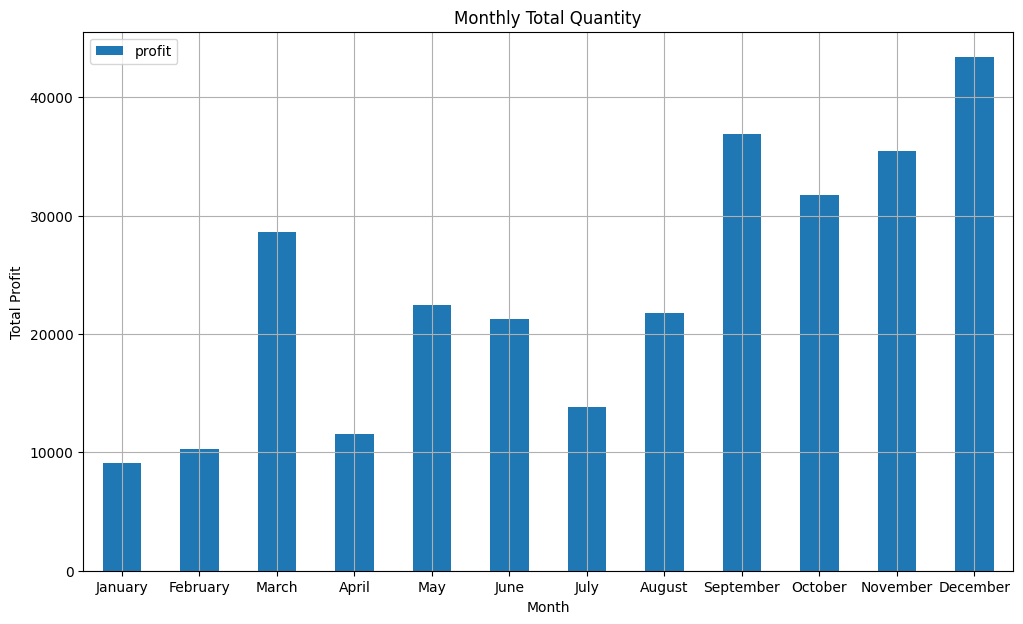

In [23]:
#18
#Membuat grafik
df_groupby.plot(x='month',
           y=['profit'],
           kind='bar',
           grid = True,
           xlabel = 'Month',
           ylabel = 'Total Profit',
           figsize=(12,7), # mengatur besar kecil ukuran gambar
           rot = 0, #Rotasi
           title = 'Monthly Total Quantity',
           table = False,
           sort_columns = False,
           secondary_y = False)

## Menjalankan SQL di Colab dengan `sqlite3`

In [24]:
#19
#Menjalankan SQL di Colab
from sqlite3 import connect
conn = connect(':memory:')
df.to_sql('tokopaedi',conn, index=False, if_exists='replace')

9994

In [25]:
#20
#Query SQL
df_sql = pd.read_sql("""
SELECT
    tokopaedi.city,
    sum(tokopaedi.profit) profit
from
    tokopaedi
group by
    1
order by
    2 desc
limit 10
""", conn)
df_sql

,city,profit
0,New York City,62036.9837
1,Los Angeles,30440.7579
2,Seattle,29156.0967
3,San Francisco,17507.3854
4,Detroit,13181.7908
5,Lafayette,10018.3876
6,Jackson,7581.6828
7,Atlanta,6993.6629
8,Minneapolis,6824.5846
9,San Diego,6377.1960


In [26]:
#21
#Buat top 5 city berdasarkan sales pada bulan November 2016 dengan menggunakan sql
df_sql2 = pd.read_sql("""
SELECT
  tokopaedi.city,
  sum(tokopaedi.sales) sales
  from tokopaedi
where tokopaedi.month = "November" and tokopaedi.year = 2016 group by 1 order by 2 DESC limit 5 """, conn)
df_sql2

,city,sales
0,Los Angeles,12590.884
1,New York City,5571.304
2,Lancaster,5016.549
3,Philadelphia,3830.670
4,Parma,3588.096


#Minitask

Tampilkan TOP 5 City selama 2016 dengan berdasarkan nilai profit yang paling tinggi. Tampilkan juga dengan bar diagram.

            city  total_profit
0  New York City    12354.2703
1    Los Angeles     9115.6400
2      Lafayette     8789.8231
3        Detroit     7385.8329
4     Providence     4205.2012


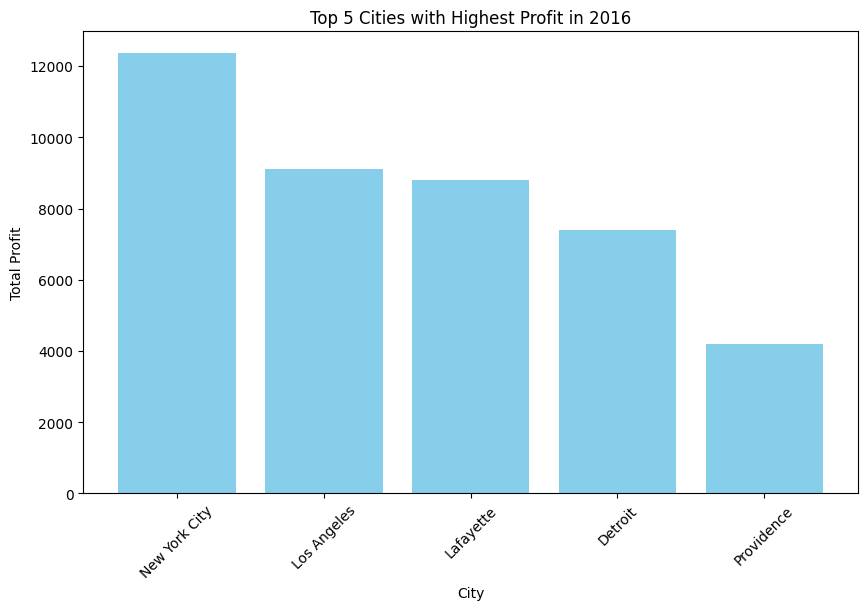

In [40]:
import matplotlib.pyplot as plt

# Execute the query and store the results in a DataFrame
df_top_cities = pd.read_sql("""
SELECT
  tokopaedi.city,
  SUM(tokopaedi.profit) AS total_profit
FROM tokopaedi
WHERE year = 2016
GROUP BY city
ORDER BY total_profit DESC
LIMIT 5
""",conn)

print(df_top_cities)

# Visualize the top 5 cities with a bar diagram
plt.figure(figsize=(10, 6))
plt.bar(df_top_cities['city'], df_top_cities['total_profit'], color='skyblue')
plt.title('Top 5 Cities with Highest Profit in 2016')
plt.xlabel('City')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()



Berikut contoh pengerjaan data yang lain: https://drive.google.com/drive/folders/1panwFfAKVaMzguX1jxxn0bkHaNE5IJFB?usp=sharing